In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib ipympl

#%matplotlib inline

In [2]:
# A showdown of the NanoUPS.com power controller vs the Tripp-Lite ECO650LCD
# each powering a TP-Link TL-SG1005D switch.
# Tripp-Lite ECO650LCD ran on battery for 9.75 hours (impressive)
# Current draw from battery was about 350ma X 9.75h = 3.4Ah
# Lead acid 5Ah battery was about 1 1/2 years old and had been through a few power cycles.
# NanoUPS ran on battery for 82.6 hours (impressive!)
# Current draw from battery was about 60ma X 82.6h = 4.9Ah
# LiFePO4 5Ah battery was about 2 1/2 years old and had been through a few power cycles.
# NanoUPS ran much longer due to the much long lifespan of a LiFePO4 5Ah battery
# and the lower current draw due to not converting up 120VAC and back down.

In [3]:
df = pd.read_csv('data/NanoUPS-vs-ECO650LCD-2023-11-19-data.csv')  # read from data dir in checkout dir
df
df.Time

0       2023-11-19T20:12:27
1       2023-11-19T20:13:27
2       2023-11-19T20:14:27
3       2023-11-19T20:15:28
4       2023-11-19T20:16:28
               ...         
6940    2023-11-24T16:38:08
6941    2023-11-24T16:39:08
6942    2023-11-24T16:40:08
6943    2023-11-24T16:41:09
6944    2023-11-24T16:42:09
Name: Time, Length: 6945, dtype: object

In [4]:
print(df.head())

                  Time   A0  A0volt  A0tempF   A1  A1volt  A1tempF   A2  \
0  2023-11-19T20:12:27  147    0.72    71.33  509    2.48    389.8  509   
1  2023-11-19T20:13:27  147    0.72    71.33  509    2.48    389.8  509   
2  2023-11-19T20:14:27  147    0.72    71.33  509    2.48    389.8  509   
3  2023-11-19T20:15:28  147    0.72    71.33  509    2.48    389.8  509   
4  2023-11-19T20:16:28  147    0.72    71.33  509    2.48    389.8  509   

   A2volt  A2tempF  ...  D5  D6  D7  D8  D9  D10  D11  D12  D13  \
0    2.48    389.8  ...   1   0   1   1   1    1    1    1    1   
1    2.48    389.8  ...   1   0   1   1   1    1    1    1    1   
2    2.48    389.8  ...   1   0   1   1   1    1    1    1    1   
3    2.48    389.8  ...   1   0   1   1   1    1    1    1    1   
4    2.48    389.8  ...   1   0   1   1   1    1    1    1    1   

                       SerialNumber  
0  2251441C44100820F80BA000A0000057  
1  2251441C44100820F80BA000A0000057  
2  2251441C44100820F80BA000A0000

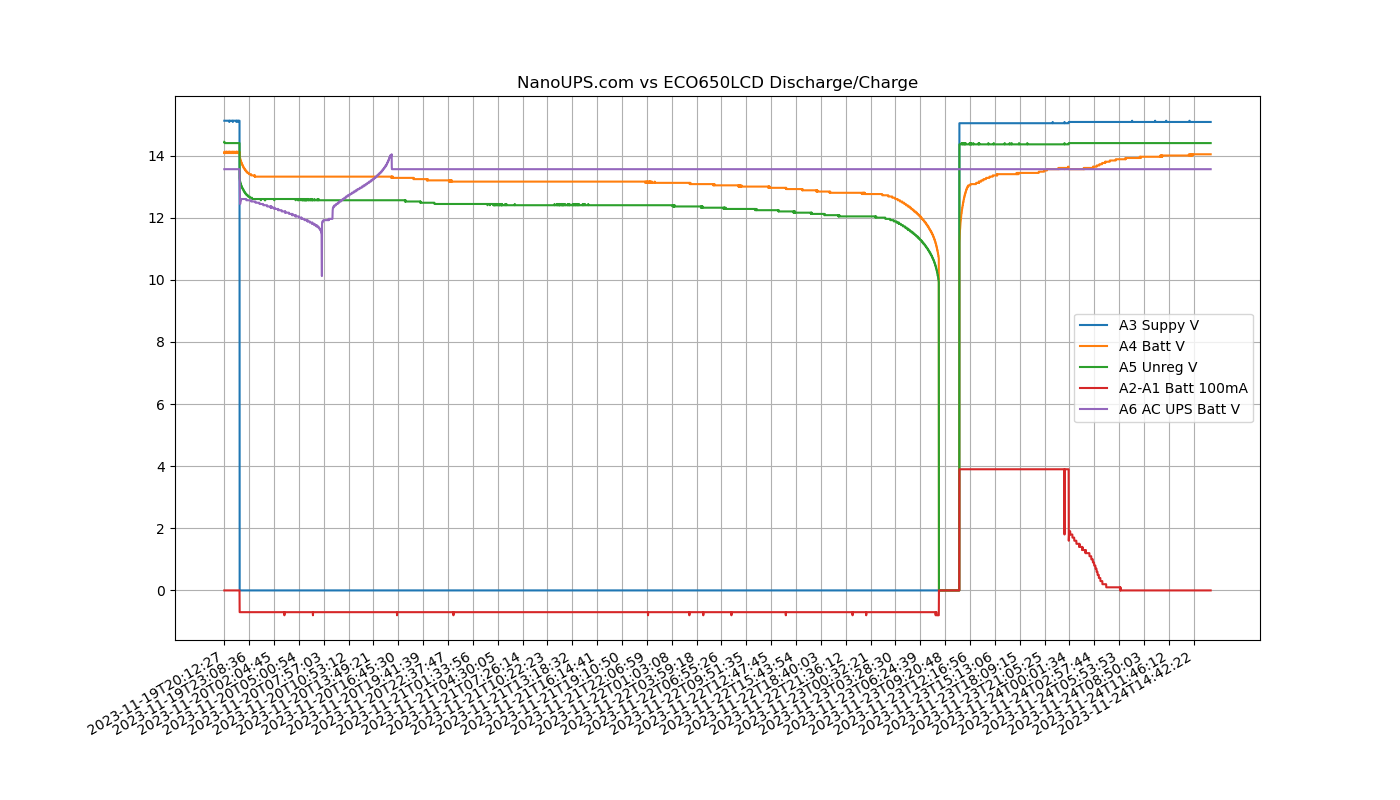

In [5]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
ax.plot(df.Time, df.A3volt, label='A3 Suppy V')
ax.plot(df.Time, df.A4volt, label='A4 Batt V')
ax.plot(df.Time, df.A5volt, label='A5 Unreg V')
ax.plot(df.Time, (df.A2volt - df.A1volt) * 10, label='A2-A1 Batt 100mA') # A1 Vref, A2 current sense amp
ax.plot(df.Time, df.A6volt, label='A6 AC UPS Batt V')
ax.set_xticks(np.arange(0, len(df.Time)+1, 175))
# ax.set_xticks(ax.get_xticks()[::200])
plt.grid()
plt.legend()
plt.gcf().autofmt_xdate()
plt.title("NanoUPS.com vs ECO650LCD Discharge/Charge")
plt.show()